In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")

In [2]:
url = '../data/bikeshare.csv'
bikes = pd.read_csv(url, index_col='datetime', parse_dates=True)

In [3]:
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
bikes.rename(columns={'count':'total_rentals'}, inplace=True)

In [7]:
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_rentals
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


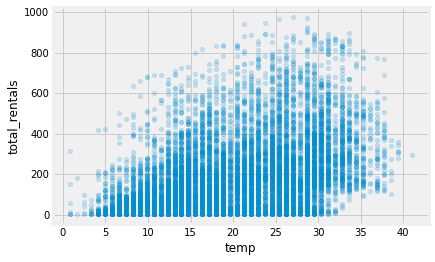

In [8]:
bikes.plot(kind = 'scatter', x='temp', y='total_rentals', alpha= .2)

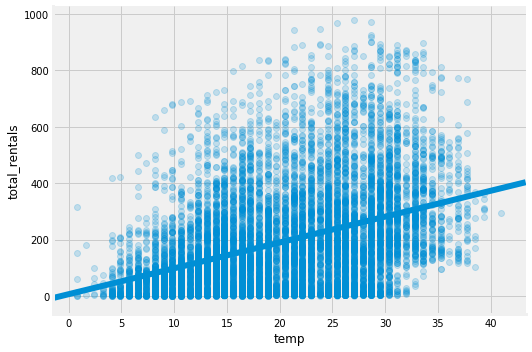

In [11]:
sns.lmplot(x='temp', y='total_rentals', data=bikes, aspect=1.5, scatter_kws={'alpha':0.2});

In [14]:
# Create X and y.
feature_cols = ['temp']
X = bikes[feature_cols]
y = bikes.total_rentals

In [20]:
from sklearn.linear_model import LinearRegression

In [22]:
# make an instance of LinearRegression object
lr = LinearRegression()
type(lr)

sklearn.linear_model.base.LinearRegression

In [23]:
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
help(lr)

Help on LinearRegression in module sklearn.linear_model.base object:

class LinearRegression(LinearModel, sklearn.base.RegressorMixin)
 |  LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : boolean, optional, default True
 |      whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (e.g. data is expected to be already centered).
 |  
 |  normalize : boolean, optional, default False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subtracting the mean and dividing by the l2-norm.
 |      If you wish to standardize, please use
 |      :class:`sklearn.preprocessing.StandardScaler` before calling ``fit`` on
 |      an estimator with ``normalize=False``.
 |  
 |  copy_X : boolean, 

In [25]:
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [47]:
X.shape # when we do the prediction, the shape should be the same as X, in this example: n X 1

(10886, 1)

In [27]:
lr.intercept_

6.04621295961681

In [28]:
lr.coef_

array([9.17054048])

In [29]:
# Per future warning, one-dimensional arrays must be reshaped using the following.
lr.predict(np.array([0]).reshape(1,-1))

array([6.04621296])

In [31]:
np.array([0])

array([0])

In [32]:
np.array([0]).reshape(1,-1)

array([[0]])

In [36]:
np.array([2]).reshape(-1,1)

array([[2]])

In [38]:
lr.predict(np.array([3]).reshape(1,-1))

array([33.5578344])

In [40]:
np.array([0,3]).reshape(2,-1)

array([[0],
       [3]])

In [43]:
lr.predict(np.array([0,3]).reshape(2,-1))

array([ 6.04621296, 33.5578344 ])

In [48]:
lr.predict(np.array([0,3]).reshape(-1,1))

array([ 6.04621296, 33.5578344 ])

In [50]:
lr.predict(np.array([0,3]).reshape(-1,1))

array([ 6.04621296, 33.5578344 ])

In [52]:
X_new = [[0], [3],[2]]
lr.predict(X_new)

array([ 6.04621296, 33.5578344 , 24.38729392])

In [53]:
lr.predict(np.array([25]).reshape(-1,1))

array([235.309725])

In [54]:
bikes['temp_F'] = bikes.temp * 1.8 + 32
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_rentals,temp_F
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,49.712
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,48.236
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,48.236
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,49.712
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,49.712


In [55]:
# Create X and y.
feature_cols = ['temp_F']
X = bikes[feature_cols]
y = bikes.total_rentals

# Instantiate and fit.
linreg = LinearRegression()
linreg.fit(X, y)

# Print the coefficients.
print(linreg.intercept_)
print(linreg.coef_)

-156.98561782129428
[5.09474471]


In [56]:
#remove the temp_F column
bikes.drop('temp_F', axis = 1, inplace= True)

In [57]:
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_rentals
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [58]:
# create feature column variables
# multi linear regeression
feature_cols = ['temp', 'season', 'weather', 'humidity']

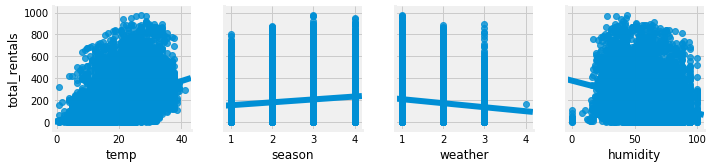

In [59]:
sns.pairplot(bikes, x_vars = feature_cols, y_vars = 'total_rentals', kind ='reg')

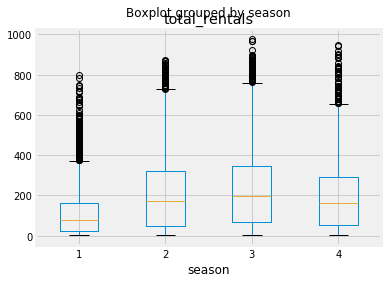

In [60]:
# Box plot of rentals, grouped by season
bikes.boxplot(column='total_rentals', by='season');

In [62]:
bikes[bikes.season==1].total_rentals.mean()

116.34326135517499

In [63]:
bikes[bikes.season==1].total_rentals.median()

78.0

In [64]:
# Create a list of features.
feature_cols = ['temp', 'season', 'weather', 'humidity']
X = bikes[feature_cols]
y = bikes.total_rentals
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [65]:
lr.coef_

array([ 7.86482499, 22.53875753,  6.67030204, -3.11887338])

In [66]:
lr.intercept_

159.52068786129772